# Task 6.2

## Contents:

#### 1. Import Libraries and Data
#### 2. Exploring Relationships
    Correlation Heatmap
    Scatterplot
    Pair Plot
    Categortical Plot
#### 3. Answer Questions
#### 4. Defining Hypotheses

### 1. Importing Libraires and Data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [30]:
# Creating a path.
path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 6/College Football Portal and Recruiting Analysis'

In [31]:
# Import Cleaned data set. 
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'cfb_portal_recruit_merged.pkl'))

In [32]:
df.shape

(52181, 19)

In [33]:
df.columns

Index(['season', 'first_name', 'last_name', 'position', 'school',
       'transfer_to', 'transfer_date', 'rating', 'stars', 'eligibility',
       'date_of_trasfer', 'time_of_transfer', 'ranking', 'committed_to',
       'recruit_type', 'city', 'state_province', 'country', '_merge'],
      dtype='object')

In [34]:
df.dtypes

season                 int64
first_name            object
last_name             object
position              object
school                object
transfer_to           object
transfer_date         object
rating               float64
stars                float64
eligibility           object
date_of_trasfer       object
time_of_transfer      object
ranking              float64
committed_to          object
recruit_type          object
city                  object
state_province        object
country               object
_merge              category
dtype: object

In [35]:
df.head()

,season,first_name,last_name,position,school,transfer_to,transfer_date,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
0,2021,Cameron,Wilkins,LB,Missouri,UT San Antonio,2021-07-31T14:46:00.000Z,NaN,3.0,Immediate,7/31/21,14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2021,Stephon,Wright,DL,Arizona State,SMU,2021-07-29T15:50:00.000Z,NaN,4.0,Immediate,7/29/21,15:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2021,Javar,Strong,S,Arkansas State,NaN,2021-07-28T15:25:00.000Z,NaN,3.0,Immediate,7/28/21,15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2021,Noah,Mitchell,LB,UT San Antonio,NaN,2021-07-27T15:22:00.000Z,NaN,3.0,Immediate,7/27/21,15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2021,Trivenskey,Mosley,RB,Southern Mississippi,NaN,2021-07-26T00:00:00.000Z,NaN,3.0,TBD,7/26/21,00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [36]:
# Dropping Transfer_date col. Already split into 2 col.
df.drop(columns= ['transfer_date'])

,season,first_name,last_name,position,school,transfer_to,rating,stars,eligibility,date_of_trasfer,time_of_transfer,ranking,committed_to,recruit_type,city,state_province,country,_merge
0,2021,Cameron,Wilkins,LB,Missouri,UT San Antonio,NaN,3.0,Immediate,7/31/21,14:46:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2021,Stephon,Wright,DL,Arizona State,SMU,NaN,4.0,Immediate,7/29/21,15:50:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2021,Javar,Strong,S,Arkansas State,NaN,NaN,3.0,Immediate,7/28/21,15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,2021,Noah,Mitchell,LB,UT San Antonio,NaN,NaN,3.0,Immediate,7/27/21,15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,2021,Trivenskey,Mosley,RB,Southern Mississippi,NaN,NaN,3.0,TBD,7/26/21,00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52176,2023,Jacob,Harris,WR,Westerville Central,NaN,0.7844,2.0,NaN,NaN,NaN,2299.0,Bowling Green,HighSchool,Westerville,OH,USA,right_only
52177,2023,Trey,Dubuc,LS,Cardinal Gibbons,NaN,0.7844,2.0,NaN,NaN,NaN,2300.0,South Florida,HighSchool,Fort Lauderdale,FL,USA,right_only
52178,2023,Ezekiel,Rodrigues,S,Mililani,NaN,0.7833,2.0,NaN,NaN,NaN,2301.0,Hawai'i,HighSchool,Mililani,HI,USA,right_only
52179,2023,DeAndre,Beasley Jr.,CB,Bishop Miege,NaN,0.7800,2.0,NaN,NaN,NaN,2302.0,NaN,HighSchool,Lees Summit,MO,USA,right_only


### 2. Exploring Relationships

#### Questions to pick out variables:
    What schools have higher transfer rates? 
    Is there a correlation between transfers and recruits?
    Are certain positions more prone to transfer? 
    Are there schools that have higher rated recruits? 
    Is rank, rating, or star rating related to the transfer portal?
    What schools are getting more recruits? Transfers?
    Is there correlation between ranking, stars, and rating?

In [37]:
# creating a correlation matrix
df.corr()

,season,rating,stars,ranking
season,1.000000,0.274058,0.249927,-0.044810
rating,0.274058,1.000000,0.906510,-0.791345
stars,0.249927,0.906510,1.000000,-0.740553
ranking,-0.044810,-0.791345,-0.740553,1.000000


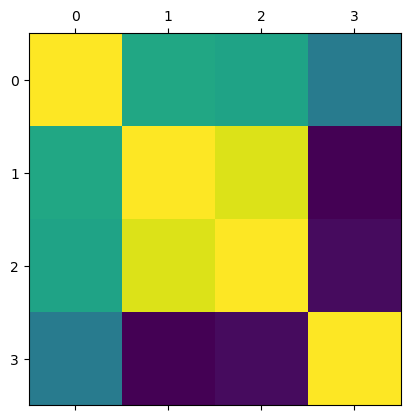

In [38]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [39]:
sub1 = df[['rating', 'ranking', 'stars']]

Text(0.5, 1.0, 'Correlation Matrix')

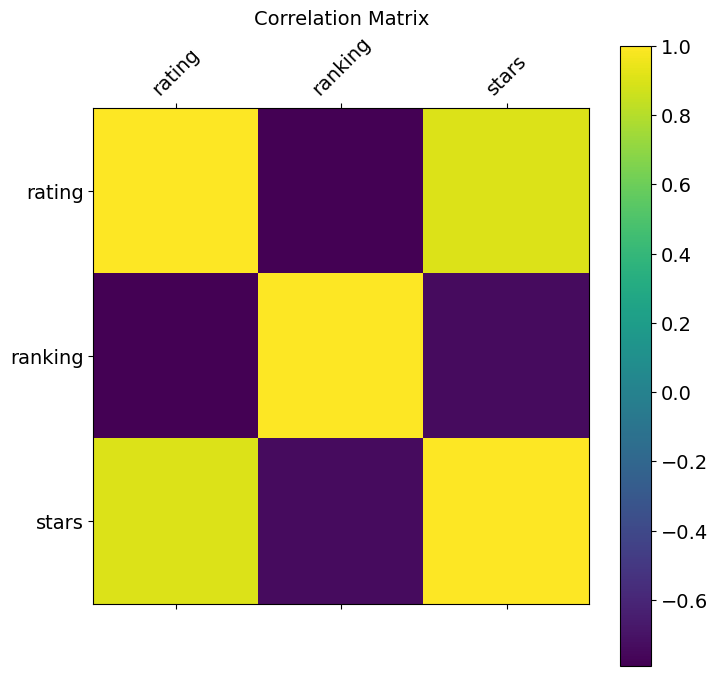

In [40]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub1.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub1.shape[1]), sub1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub1.shape[1]), sub1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

This show that there is a high correlation between the stars rating and the ratings column. Though these correlations don't give much information to the questions we are asking.

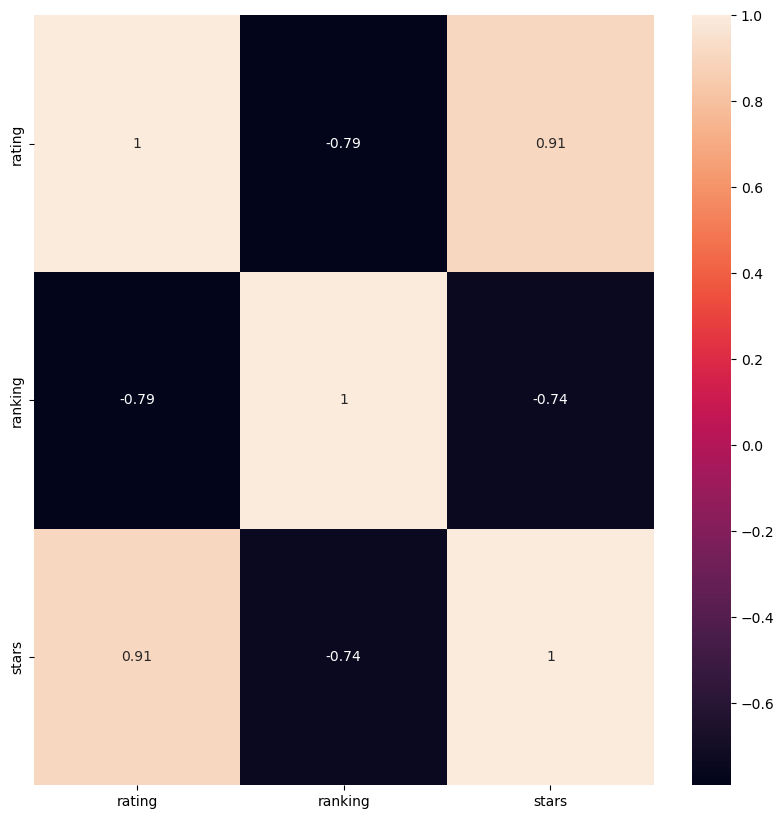

In [41]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

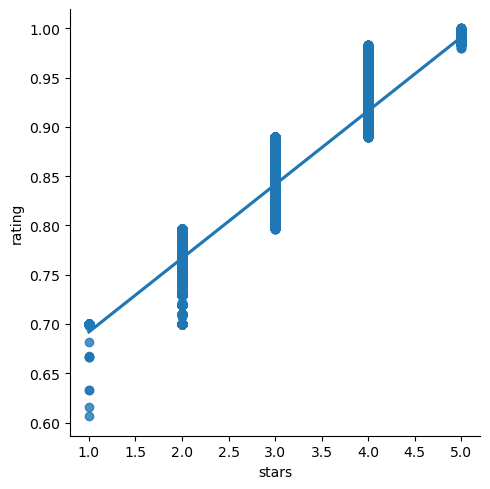

In [42]:
# Scatterplot

sns.lmplot(x = 'stars', y = 'rating', data = df)

The above plot shows that there is a possitive correlation between the rating and stars. 5 star rated are more closely group. Which could mean their overall rating top players is better for top prospects.

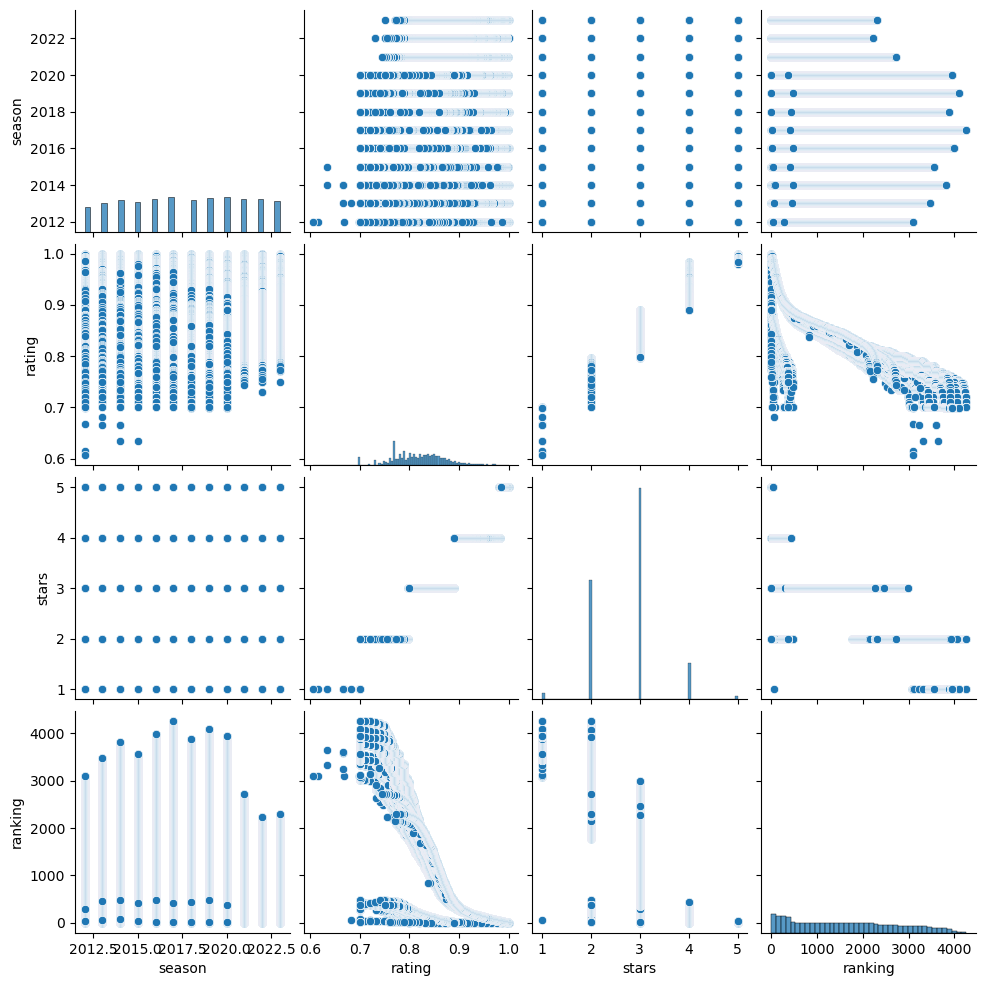

In [43]:
# Create a pair plot 

g = sns.pairplot(df)

The above pair plot doesn't show any other correlations that i need to explore. Player Ranking has a low correlation to rating and stars. 

<AxesSubplot:xlabel='rating', ylabel='Count'>

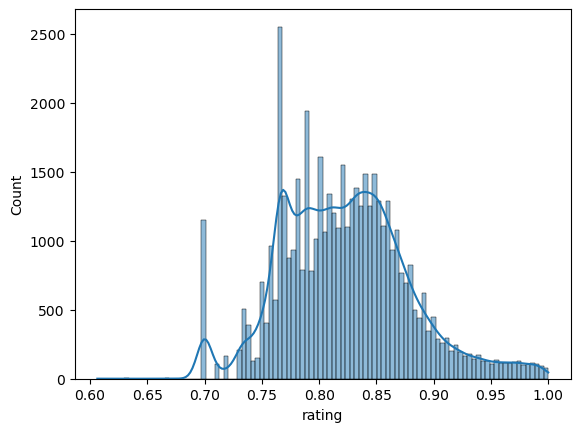

In [51]:
# creating a categorical plot

sns.histplot(df['rating'], bins = 100, kde = True)

This shows that a majority of the players are rated between .8 and .85. There is a large spike around .75

### 3. Answering Questions

None of my original questions can be answered at this point. I will have to go back into the data and create some numerical values to better find correlations. What this did show me is that the rating and stars rating systems are highly correlated, while the ranking system has a strong negative correlation with the rating and stars systems. 

### 4. Hypotheses

I can't define any hypothoses at this time. 